<a href="https://colab.research.google.com/github/SisiDzy/Machine-Learning/blob/main/ML_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Build a classification model using text data

### Import the text data and train test split it.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = pd.read_csv("headline_X.csv").squeeze()
X.head()

0       MyBook Disk Drive Handles Lots of Easy Backups
1                       CIT Posts Eighth Loss in a Row
2    Candy Carson Singing The "National Anthem" Is ...
3    Why You Need To Stop What You're Doing And Dat...
4    27 Times Adele Proved She's Actually The Reale...
Name: headline, dtype: object

In [ ]:
hy_labels=pd.read_csv("headline_y.csv").squeeze()
hy = pd.get_dummies(hy_labels)
y = hy.iloc[:, 0]
y.head()

0    0
1    0
2    1
3    1
4    1
Name: clickbait, dtype: uint8

In [ ]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Vectorize the clickbait headline column into an X matrix. Run logistic regression at least three times with different tokenizers and select a single best model. Be sure to explain your choices and evaluate your models using cross validation and using test set data. Use a robust metric for classification (AUC or F1-Score for example). Inspect all models by visualizing the coefficients.

#### 1st logistic regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train = vect.fit_transform(text_train)
X_test = vect.transform(text_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)

print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))

Mean cross-validation score: 0.97


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.97
Best parameters:  {'C': 10}


In [ ]:
from sklearn.metrics import classification_report

print("Test score: {}".format(grid.score(X_test, y_test)))

y_pred = grid.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Test score: 0.9686148919135308
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3273
           1       0.97      0.96      0.97      2972

    accuracy                           0.97      6245
   macro avg       0.97      0.97      0.97      6245
weighted avg       0.97      0.97      0.97      6245



In [ ]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

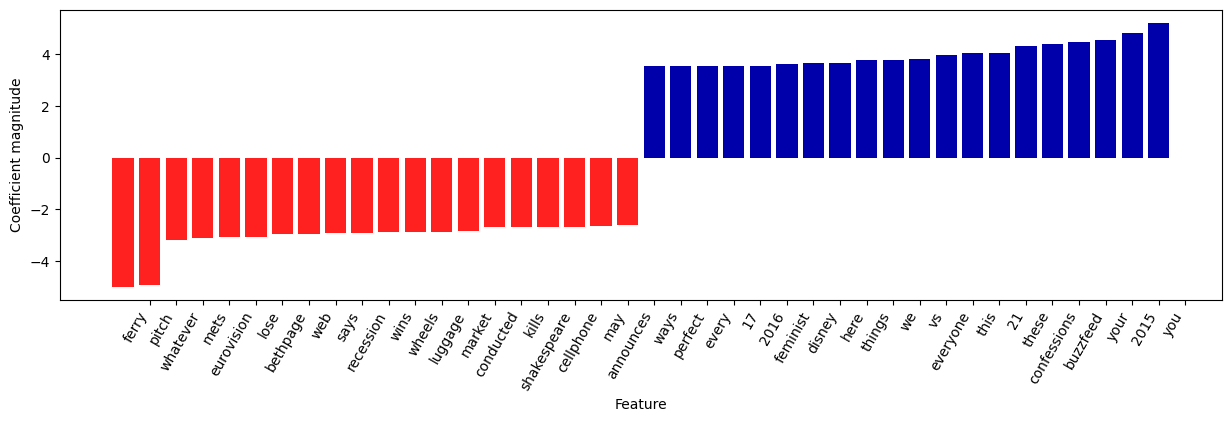

In [ ]:
coefs = LogisticRegression(C=10, max_iter=1000).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()
visualize_coefficients(coefs, feature_names, n_top_features=20)

#### 2nd logistic regression

In [ ]:
vect = CountVectorizer(ngram_range=(1, 2))
X_train = vect.fit_transform(text_train)
X_test = vect.transform(text_test)

In [ ]:
scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)

print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))

Mean cross-validation score: 0.97


In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.97
Best parameters:  {'C': 100}


In [ ]:
print("Test score: {}".format(grid.score(X_test, y_test)))

y_pred = grid.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Test score: 0.9695756605284227
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3273
           1       0.98      0.96      0.97      2972

    accuracy                           0.97      6245
   macro avg       0.97      0.97      0.97      6245
weighted avg       0.97      0.97      0.97      6245



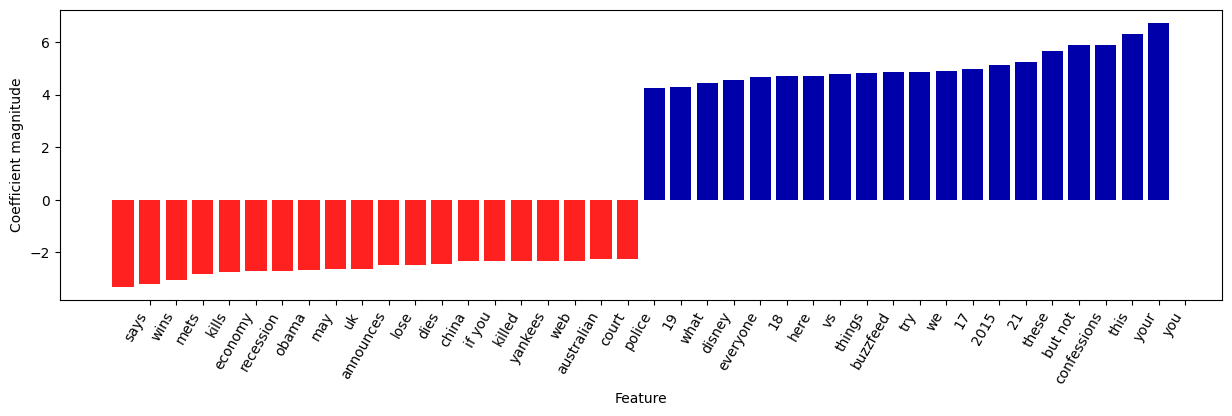

In [ ]:
coefs = LogisticRegression(C=100, max_iter=1000).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()
visualize_coefficients(coefs, feature_names, n_top_features=20)

#### 3rd logistic regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range=(1, 3), min_df=4)
X_train = vect.fit_transform(text_train)
X_test = vect.transform(text_test)

In [ ]:
scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)

print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))

Mean cross-validation score: 0.96


In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.97
Best parameters:  {'C': 10}


In [ ]:
print("Test score: {}".format(grid.score(X_test, y_test)))

y_pred = grid.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Test score: 0.9711769415532426
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3273
           1       0.97      0.97      0.97      2972

    accuracy                           0.97      6245
   macro avg       0.97      0.97      0.97      6245
weighted avg       0.97      0.97      0.97      6245



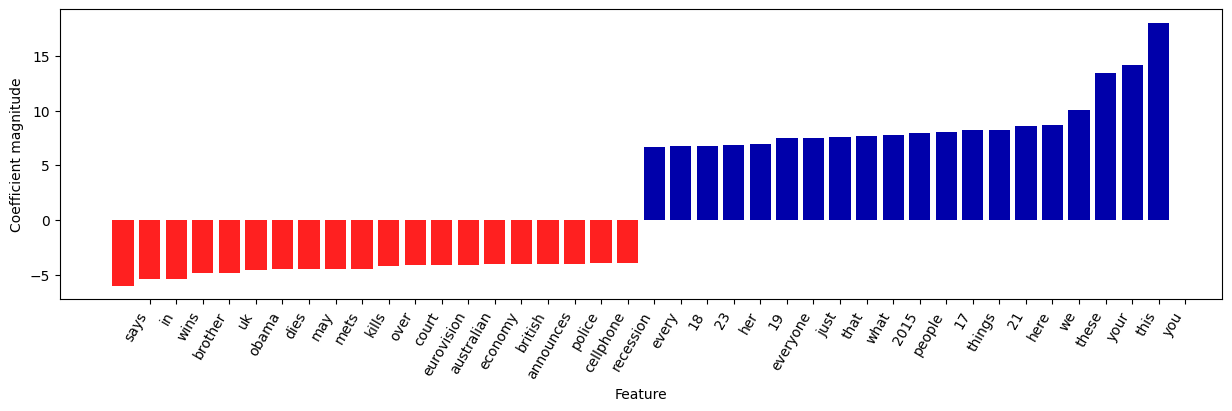

In [ ]:
coefs = LogisticRegression(C=10, max_iter=1000).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()
visualize_coefficients(coefs, feature_names, n_top_features=20)

For my three models above, the best model would be the 3rd one, since it has the highest test score that is 0.971, which means it has the best predictive performance. Its mean cross-validation score is lower than other models', but test score is more important to look at for prediction.

## Part 2: Build a predictive neural network using Keras

### Train test split the iris dataset and then run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface. Data can be imported via the following link: http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv

In [ ]:
from sklearn.preprocessing import LabelEncoder

iris = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")

label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

data = iris.iloc[:,1:]
y = data['Species']
X = data.loc[:, data.columns != 'Species']
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model1 = Sequential()
model1.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=8, activation='relu'))
model1.add(Dense(units=8, activation='relu'))
model1.add(Dense(units=3, activation='softmax'))

In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=20, batch_size=8)

Epoch 1/20
14/14 [==============================] - 1s 3ms/step - loss: 1.2003 - accuracy: 0.4196
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 1.1243 - accuracy: 0.5089
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 1.0795 - accuracy: 0.5268
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 1.0426 - accuracy: 0.5268
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 1.0064 - accuracy: 0.5268
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 0.9693 - accuracy: 0.5179
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 0.9284 - accuracy: 0.6250
Epoch 8/20
14/14 [==============================] - 0s 3ms/step - loss: 0.8898 - accuracy: 0.8036
Epoch 9/20
14/14 [==============================] - 0s 3ms/step - loss: 0.8435 - accuracy: 0.8571
Epoch 10/20
14/14 [==============================] - 0s 2ms/step - loss: 0.8021 - accuracy: 0.8571
Epoch 11/20
14/14 [

In [ ]:
score1 = model1.evaluate(X_test, y_test, batch_size=8)
print("Model 1 - Test Loss:", score1[0], "Test Accuracy:", score1[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 1.0000
Model 1 - Test Loss: 0.3250216841697693 Test Accuracy: 1.0


### Fit two models with different numbers of hidden layers and or hidden neurons and evaluate each on a test-set.

In [ ]:
model2 = Sequential()
model2.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(units=8, activation='relu'))
model2.add(Dense(units=3, activation='softmax'))

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=20, batch_size=8)

Epoch 1/20
14/14 [==============================] - 1s 2ms/step - loss: 1.4547 - accuracy: 0.3482
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.3661
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 0.9796 - accuracy: 0.6339
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 0.9337 - accuracy: 0.6250
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 0.9198 - accuracy: 0.6250
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 0.9008 - accuracy: 0.6339
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 0.8882 - accuracy: 0.6071
Epoch 8/20
14/14 [==============================] - 0s 3ms/step - loss: 0.8693 - accuracy: 0.6518
Epoch 9/20
14/14 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.6518
Epoch 10/20
14/14 [==============================] - 0s 2ms/step - loss: 0.8354 - accuracy: 0.6518
Epoch 11/20
14/14 [

In [ ]:
score2 = model2.evaluate(X_test, y_test, batch_size=8)
print("Model 2 - Test Loss:", score2[0], "Test Accuracy:", score2[1])

5/5 [==============================] - 0s 5ms/step - loss: 0.6017 - accuracy: 0.7105
Model 2 - Test Loss: 0.6017258167266846 Test Accuracy: 0.7105262875556946


### Describe the differences in the predictive accuracy of models with different numbers of hidden units/neurons. Describe the predictive strength of your best model. Be sure to explain your choice and evaluate this model using the test set.

Model1, which has 2 hidden layers with 8 units each, has an accuracy on the training data increased from 41.96% to 94.64%, which is a significant improvement and indicates that the model has successfully learned to fit the training data. Model1 has a perfect test accuracy of 100% with a low test loss of 0.325.

Model2, which only has 1 hidden layer with 8 units, has an accuracy on the training data increased from 34.82% to 65.18%, and it has a test accuracy of 71.05% with a test loss of 0.601.

Because of the higher predictive accuracy and the lower loss, two hidden layers brought better predictive performance to my model than single hidden layer. Therefore, my best model would be model1.